In [1]:
import pandas as pd

train = pd.read_csv('data/customer_segmentation/Train.csv')
test = pd.read_csv('data/customer_segmentation/Test.csv')
df = pd.concat([train, test], axis=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45211 entries, 0 to 13563
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                45211 non-null  object 
 1   customer_age                      44322 non-null  float64
 2   job_type                          45211 non-null  object 
 3   marital                           44980 non-null  object 
 4   education                         45211 non-null  object 
 5   default                           45211 non-null  object 
 6   balance                           44631 non-null  float64
 7   housing_loan                      45211 non-null  object 
 8   personal_loan                     44988 non-null  object 
 9   communication_type                45211 non-null  object 
 10  day_of_month                      45211 non-null  int64  
 11  month                             45211 non-null  object 
 12  last_cont

In [2]:
df.head()

,id,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,day_of_month,month,last_contact_duration,num_contacts_in_campaign,days_since_prev_campaign_contact,num_contacts_prev_campaign,prev_campaign_outcome,term_deposit_subscribed
0,id_43823,28.0,management,single,tertiary,no,285.0,yes,no,unknown,26,jun,303.0,4.0,NaN,0,unknown,0.0
1,id_32289,34.0,blue-collar,married,secondary,no,934.0,no,yes,cellular,18,nov,143.0,2.0,132.0,1,other,0.0
2,id_10523,46.0,technician,married,secondary,no,656.0,no,no,cellular,5,feb,101.0,4.0,NaN,0,unknown,0.0
3,id_43951,34.0,services,single,secondary,no,2.0,yes,no,unknown,20,may,127.0,3.0,NaN,0,unknown,0.0
4,id_40992,41.0,blue-collar,married,primary,no,1352.0,yes,no,cellular,13,may,49.0,2.0,NaN,0,unknown,0.0


## Imputting missing values

<Axes: >

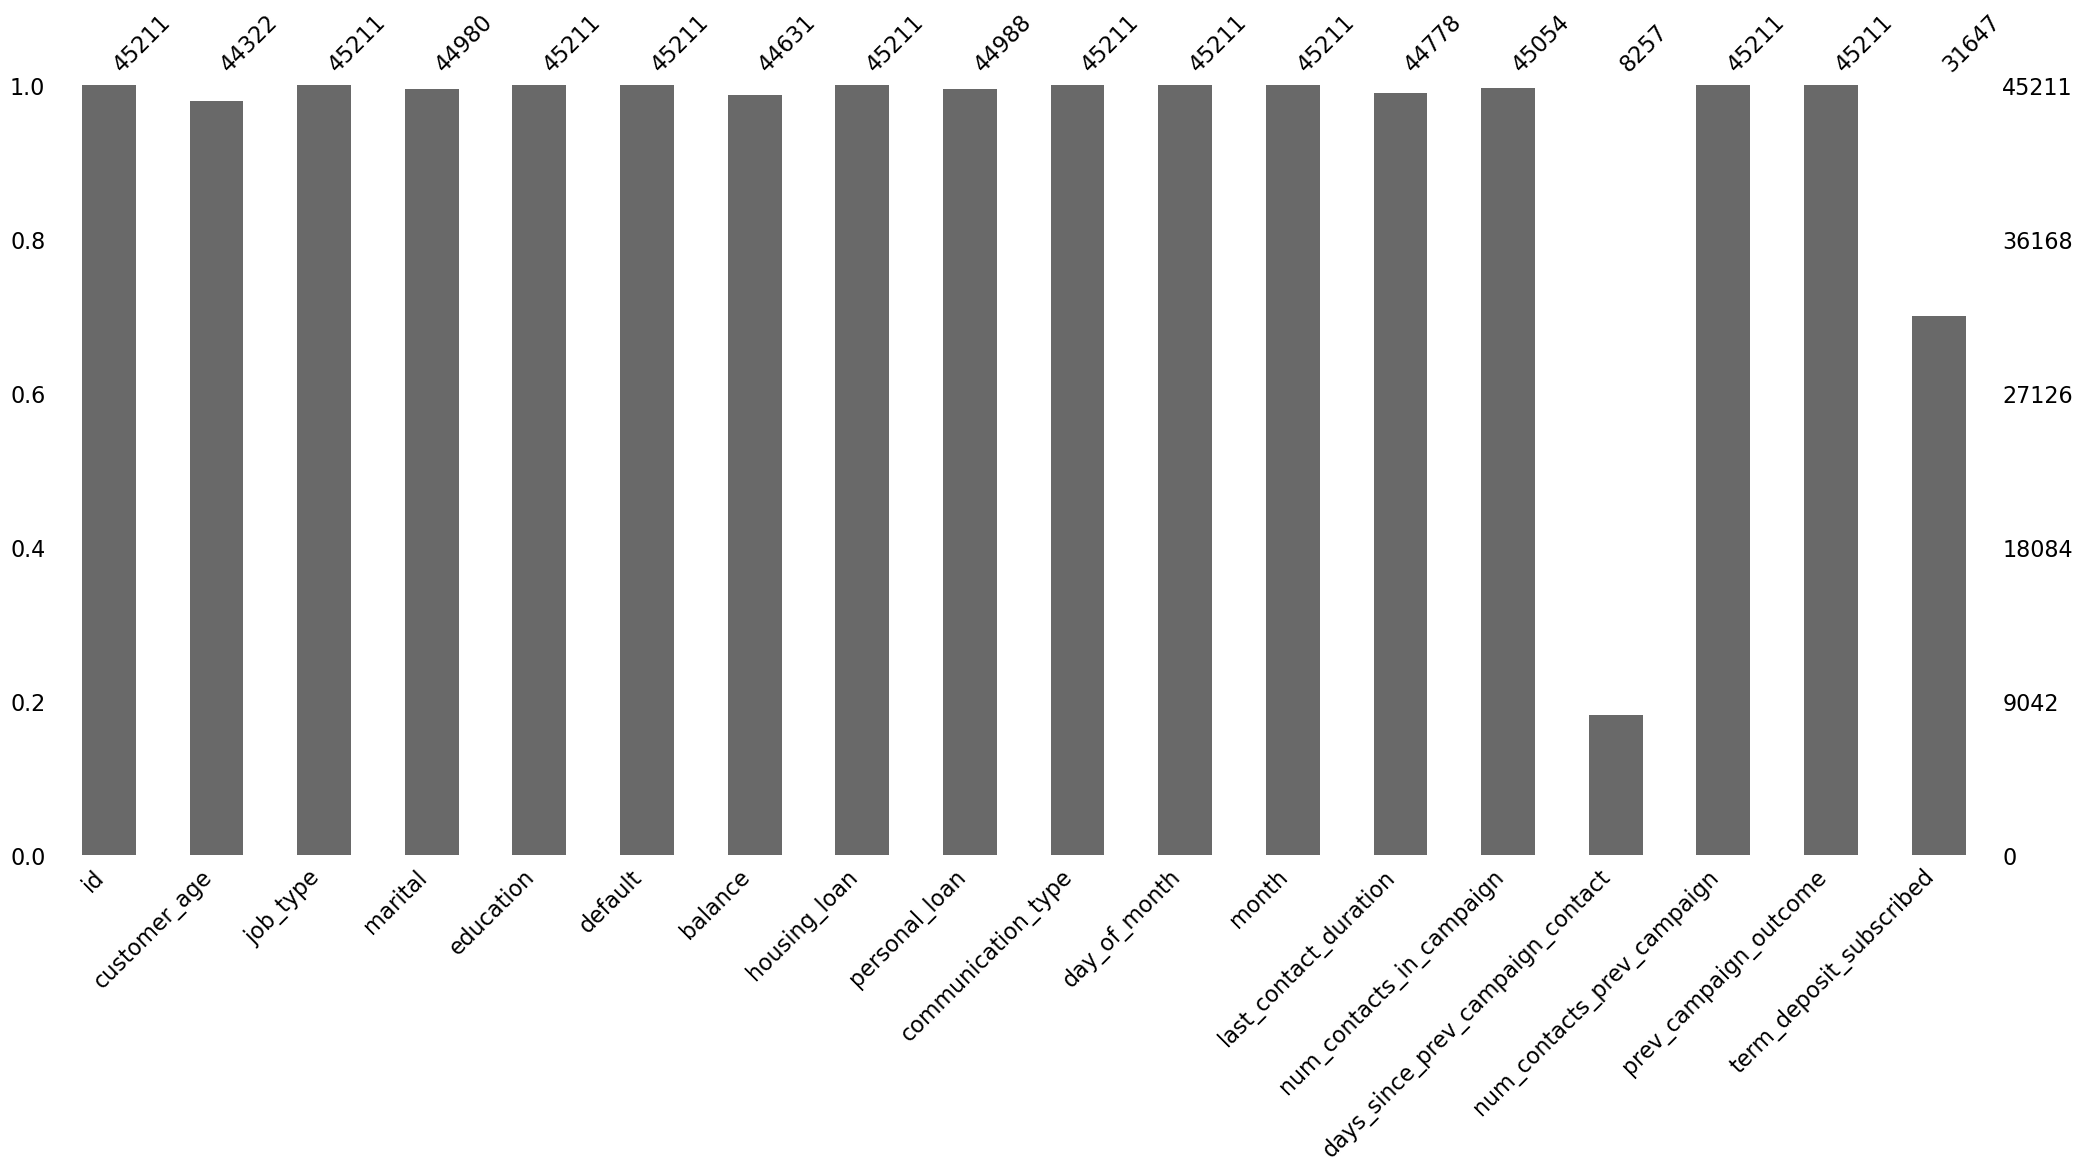

In [3]:
import seaborn as sns
import pandas as pd
import missingno as msno
%matplotlib inline
msno.bar(df)

<Axes: >

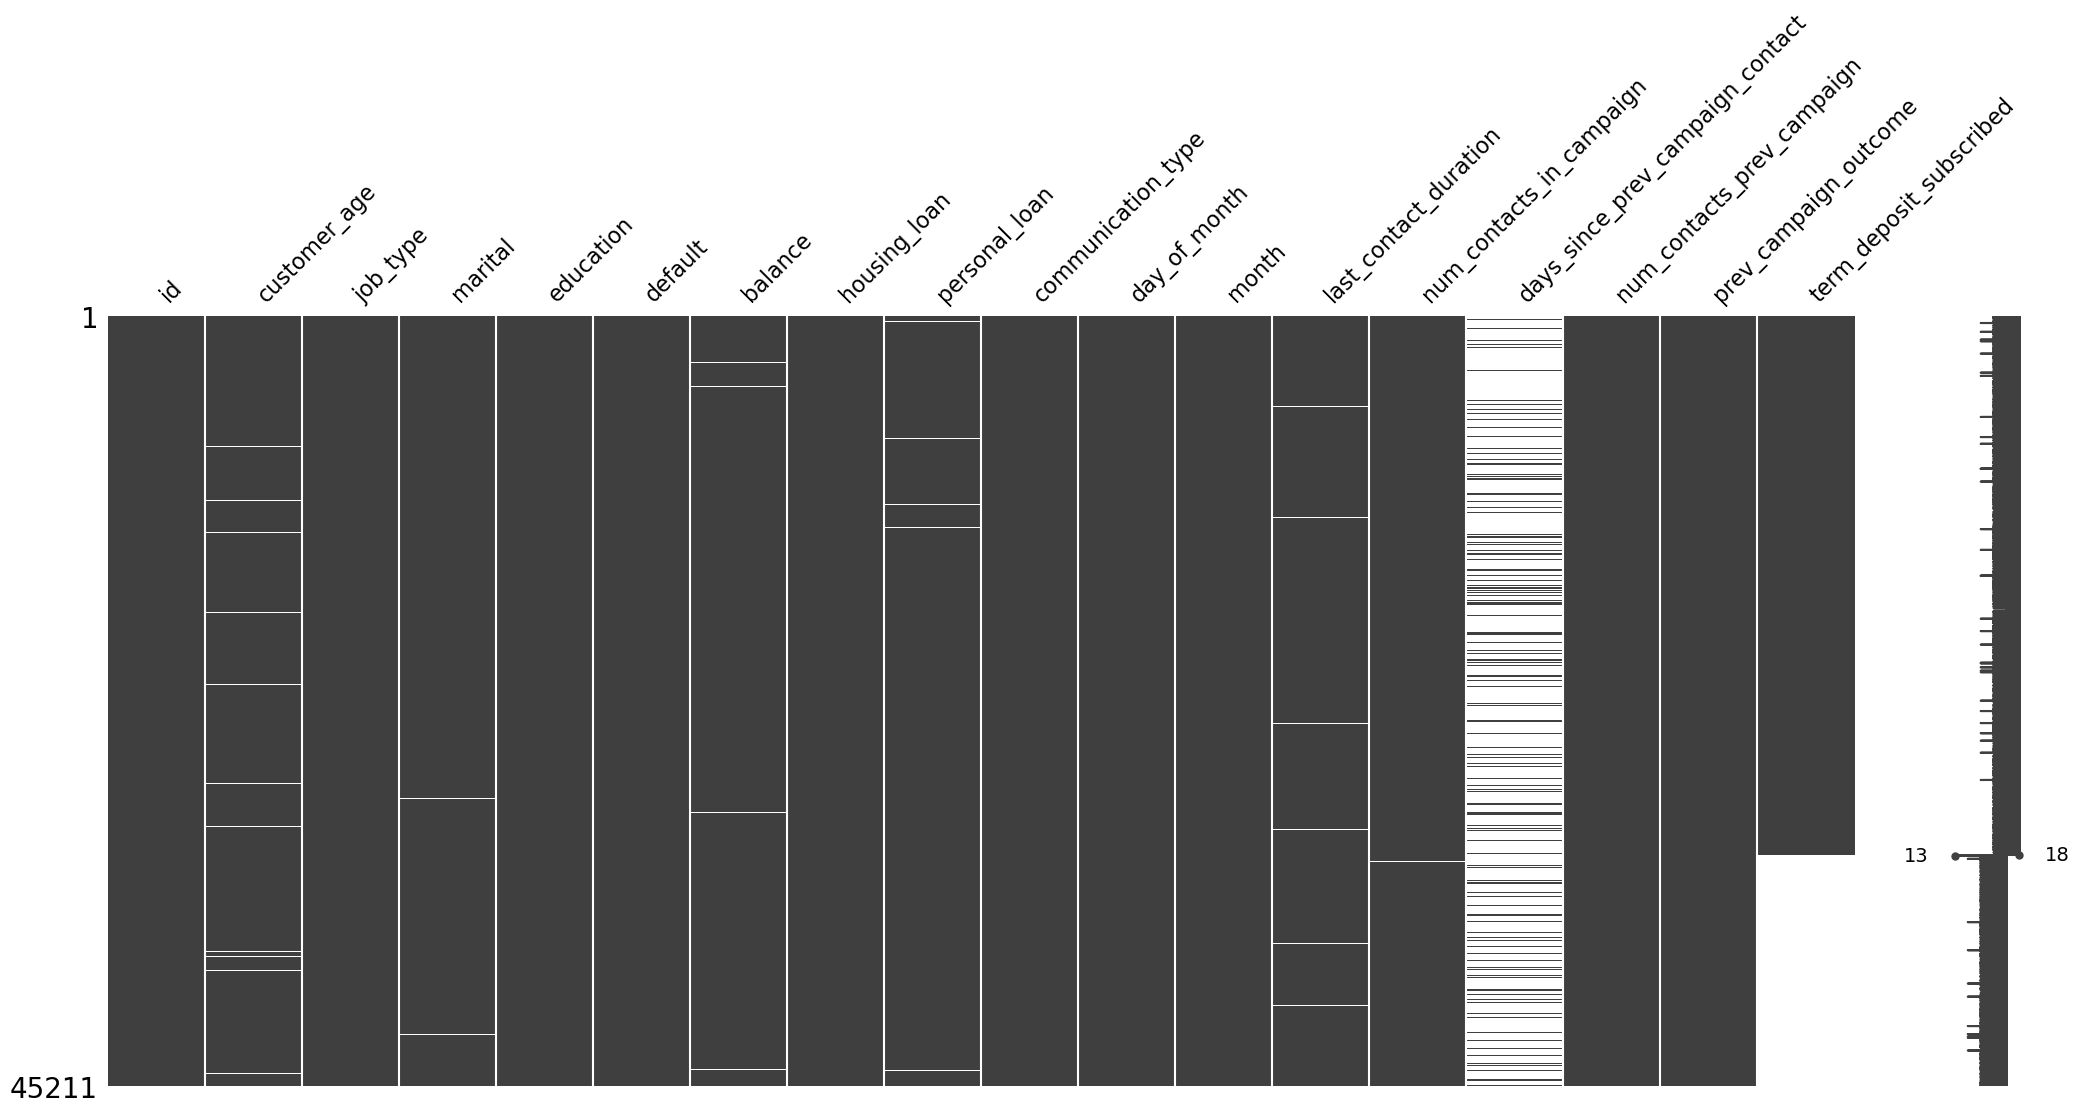

In [4]:
msno.matrix(df)

In [5]:
df.dropna(subset=['term_deposit_subscribed'], inplace=True)
df

,id,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,day_of_month,month,last_contact_duration,num_contacts_in_campaign,days_since_prev_campaign_contact,num_contacts_prev_campaign,prev_campaign_outcome,term_deposit_subscribed
0,id_43823,28.0,management,single,tertiary,no,285.0,yes,no,unknown,26,jun,303.0,4.0,NaN,0,unknown,0.0
1,id_32289,34.0,blue-collar,married,secondary,no,934.0,no,yes,cellular,18,nov,143.0,2.0,132.0,1,other,0.0
2,id_10523,46.0,technician,married,secondary,no,656.0,no,no,cellular,5,feb,101.0,4.0,NaN,0,unknown,0.0
3,id_43951,34.0,services,single,secondary,no,2.0,yes,no,unknown,20,may,127.0,3.0,NaN,0,unknown,0.0
4,id_40992,41.0,blue-collar,married,primary,no,1352.0,yes,no,cellular,13,may,49.0,2.0,NaN,0,unknown,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,id_27290,58.0,admin.,married,secondary,no,567.0,yes,no,cellular,2,feb,99.0,2.0,265.0,3,other,0.0
31643,id_20428,51.0,management,married,tertiary,no,1072.0,no,no,unknown,20,jun,31.0,7.0,NaN,0,unknown,0.0
31644,id_44679,41.0,unemployed,married,primary,no,242.0,yes,no,unknown,23,may,89.0,2.0,NaN,0,unknown,0.0
31645,id_4841,48.0,services,married,secondary,no,2699.0,no,no,cellular,11,aug,216.0,6.0,NaN,0,unknown,0.0


In [6]:
from sklearn.preprocessing import LabelEncoder
columns_to_encode=['job_type','marital','education','default','housing_loan','personal_loan','communication_type',\
                 'day_of_month','month','prev_campaign_outcome']

le = LabelEncoder()

for column in columns_to_encode:
    df[column] = le.fit_transform(df[column])

df.head()

,id,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,day_of_month,month,last_contact_duration,num_contacts_in_campaign,days_since_prev_campaign_contact,num_contacts_prev_campaign,prev_campaign_outcome,term_deposit_subscribed
0,id_43823,28.0,4,2,2,0,285.0,1,0,2,25,6,303.0,4.0,NaN,0,3,0.0
1,id_32289,34.0,1,1,1,0,934.0,0,1,0,17,9,143.0,2.0,132.0,1,1,0.0
2,id_10523,46.0,9,1,1,0,656.0,0,0,0,4,3,101.0,4.0,NaN,0,3,0.0
3,id_43951,34.0,7,2,1,0,2.0,1,0,2,19,8,127.0,3.0,NaN,0,3,0.0
4,id_40992,41.0,1,1,0,0,1352.0,1,0,0,12,8,49.0,2.0,NaN,0,3,0.0


In [7]:
df.drop(['id','days_since_prev_campaign_contact'], axis=1, inplace=True)
df.head()

,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,day_of_month,month,last_contact_duration,num_contacts_in_campaign,num_contacts_prev_campaign,prev_campaign_outcome,term_deposit_subscribed
0,28.0,4,2,2,0,285.0,1,0,2,25,6,303.0,4.0,0,3,0.0
1,34.0,1,1,1,0,934.0,0,1,0,17,9,143.0,2.0,1,1,0.0
2,46.0,9,1,1,0,656.0,0,0,0,4,3,101.0,4.0,0,3,0.0
3,34.0,7,2,1,0,2.0,1,0,2,19,8,127.0,3.0,0,3,0.0
4,41.0,1,1,0,0,1352.0,1,0,0,12,8,49.0,2.0,0,3,0.0


In [8]:
from reparo import MICE
from sklearn.impute import SimpleImputer


columns_to_imput = ['customer_age', 'job_type','balance','personal_loan','last_contact_duration','num_contacts_in_campaign']
imputer = SimpleImputer(strategy='most_frequent')

imputer.fit(df[columns_to_imput])
df[columns_to_imput] = imputer.transform(df[columns_to_imput])
df.head()

,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,day_of_month,month,last_contact_duration,num_contacts_in_campaign,num_contacts_prev_campaign,prev_campaign_outcome,term_deposit_subscribed
0,28.0,4.0,2,2,0,285.0,1,0.0,2,25,6,303.0,4.0,0,3,0.0
1,34.0,1.0,1,1,0,934.0,0,1.0,0,17,9,143.0,2.0,1,1,0.0
2,46.0,9.0,1,1,0,656.0,0,0.0,0,4,3,101.0,4.0,0,3,0.0
3,34.0,7.0,2,1,0,2.0,1,0.0,2,19,8,127.0,3.0,0,3,0.0
4,41.0,1.0,1,0,0,1352.0,1,0.0,0,12,8,49.0,2.0,0,3,0.0


<Axes: >

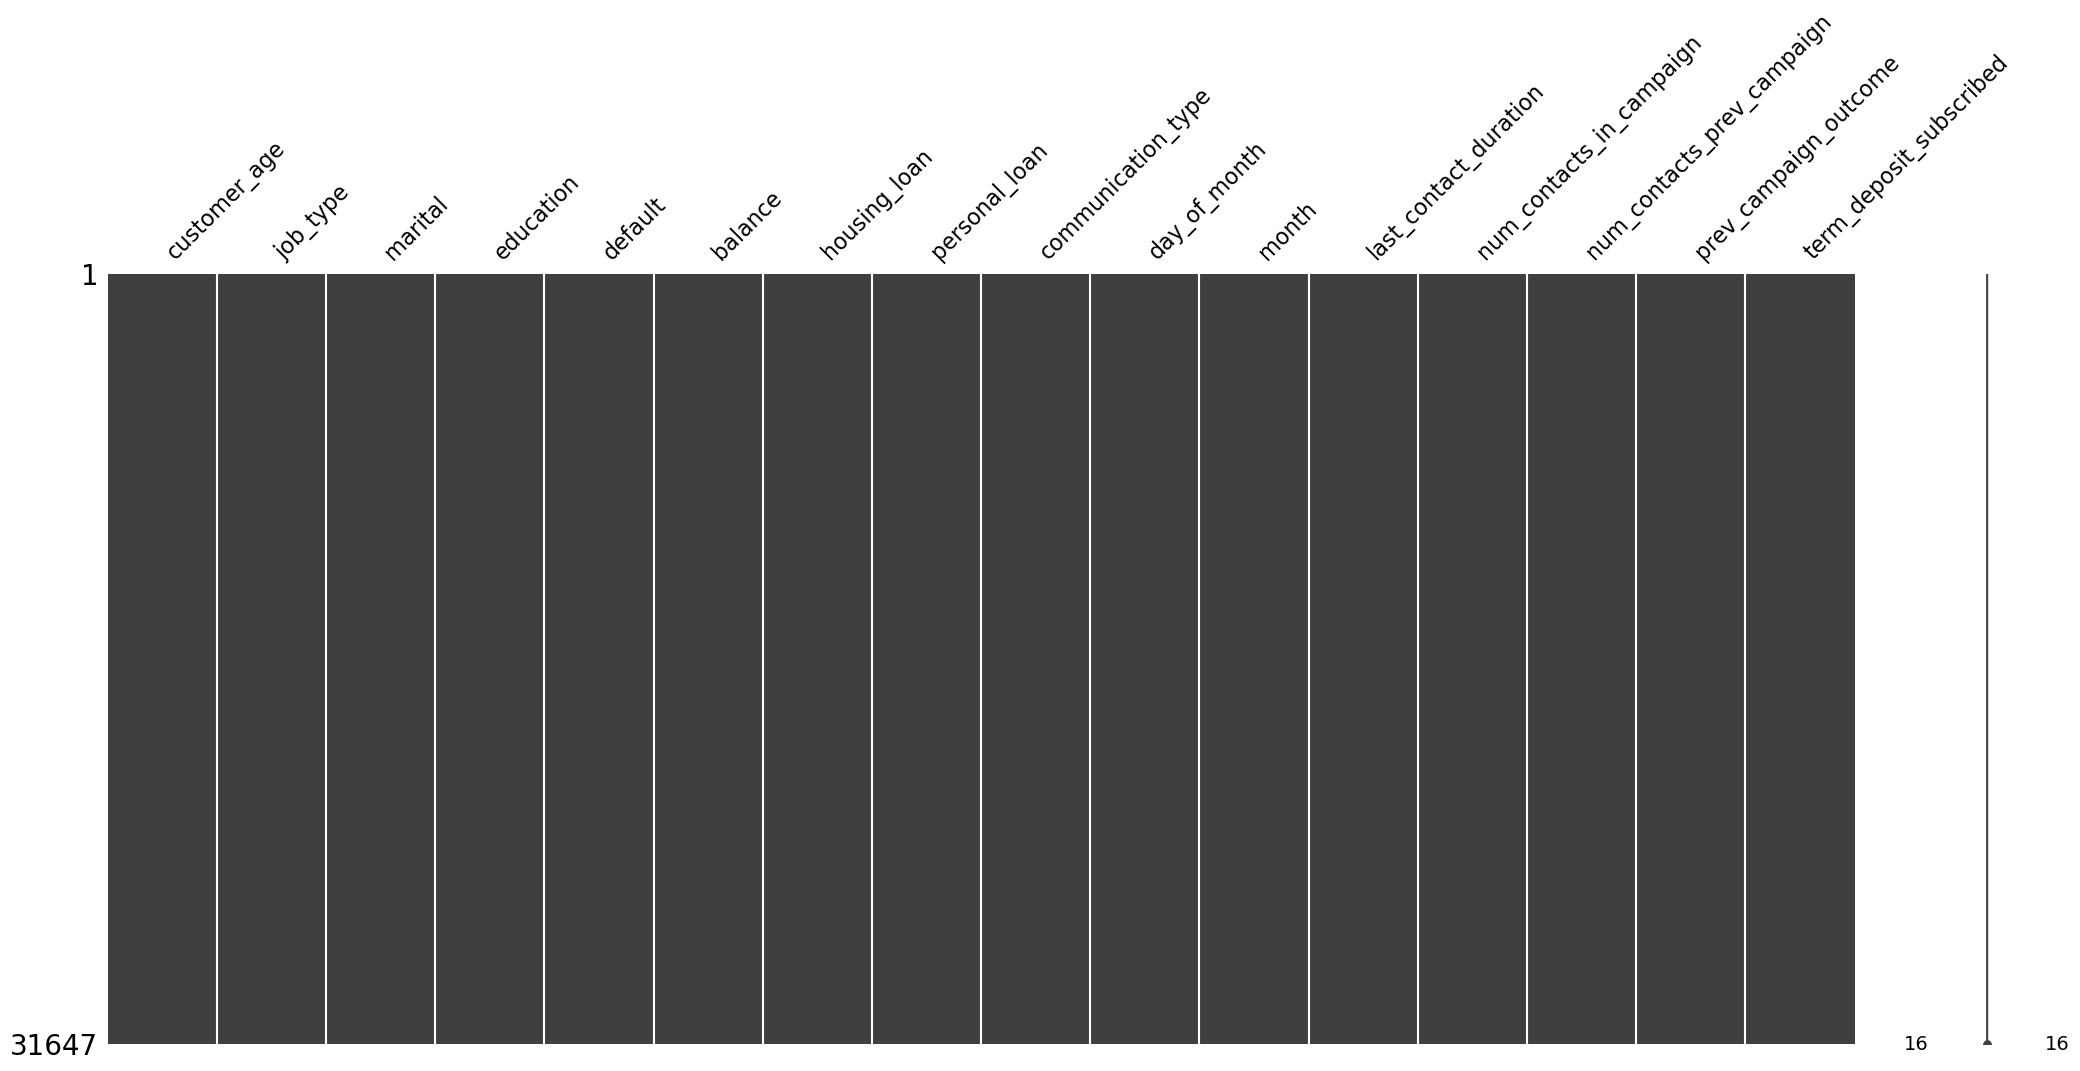

In [9]:
msno.matrix(df)

## Scaling

In [10]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans

X = df.drop('term_deposit_subscribed', axis=1)  
y = df['term_deposit_subscribed'] 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(X_scaled)
X_scaled = pca.transform(X_scaled)

## Silhouette analysis

For n_clusters = 2, The average silhouette_score is : 0.43863260331339116


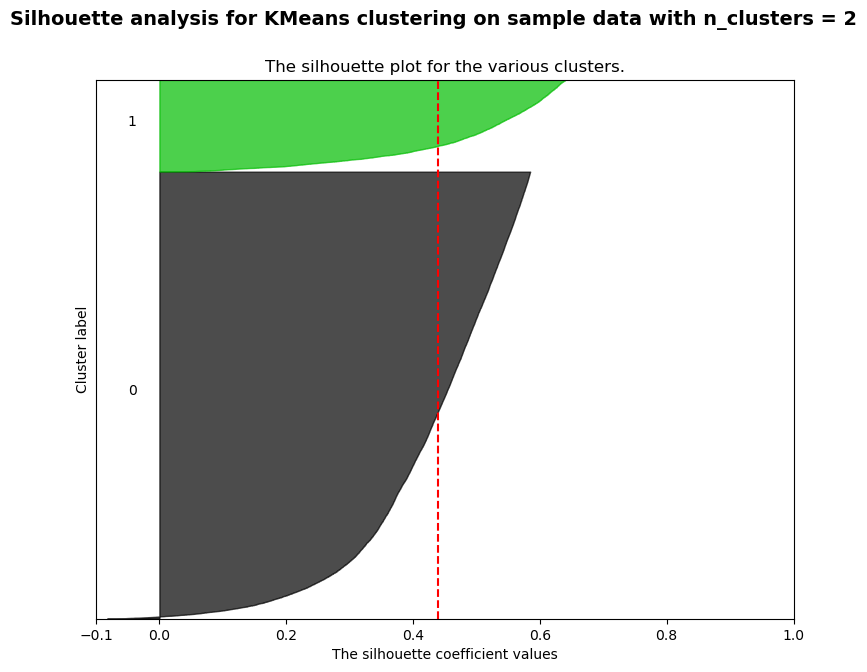

For n_clusters = 3, The average silhouette_score is : 0.4774043438310502


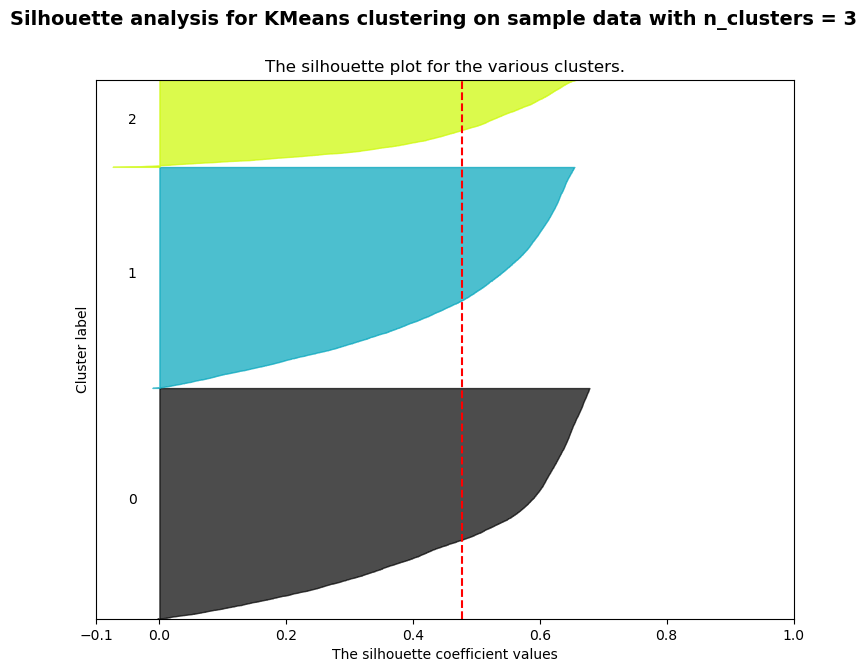

For n_clusters = 4, The average silhouette_score is : 0.40460393588402666


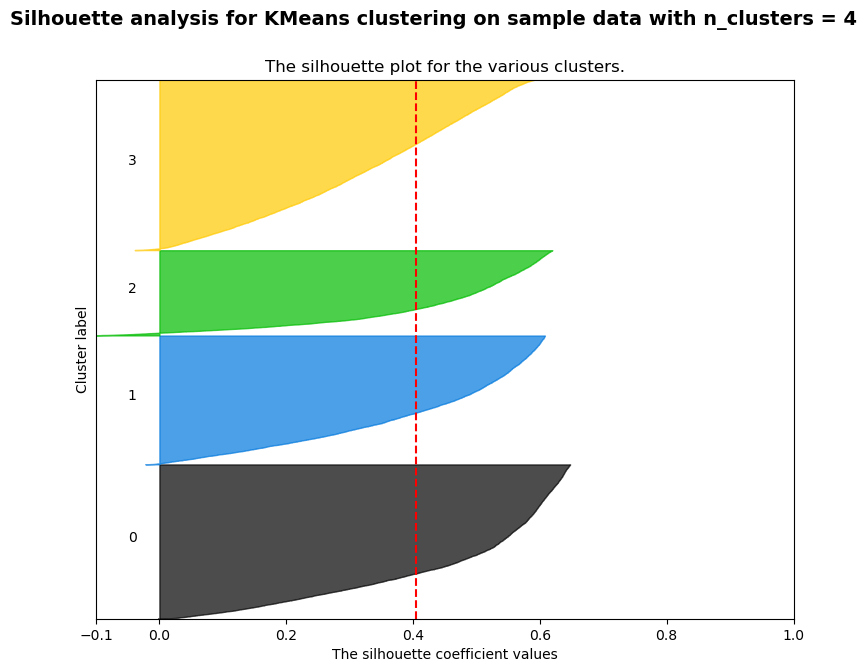

For n_clusters = 5, The average silhouette_score is : 0.3586316409183237


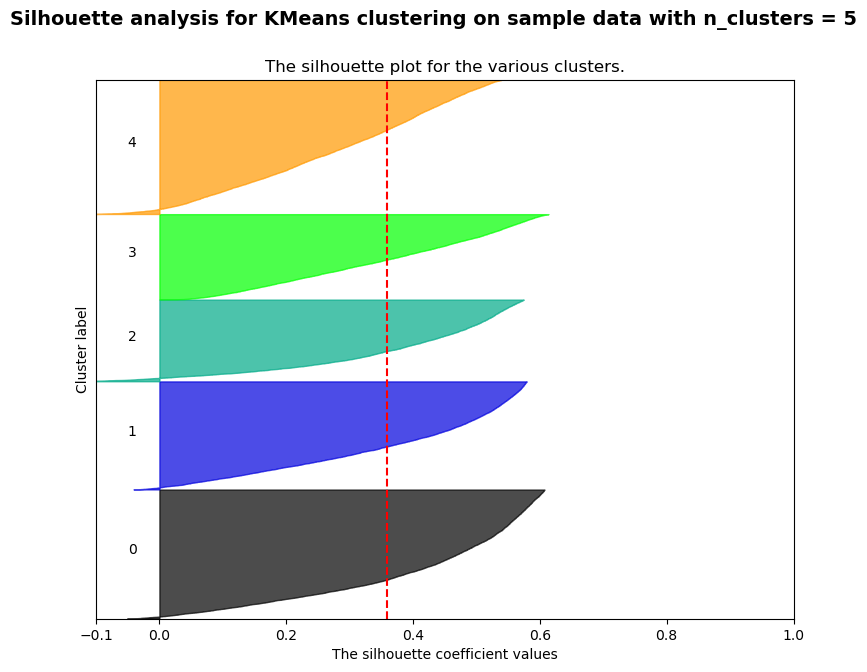

For n_clusters = 6, The average silhouette_score is : 0.3720281305788234


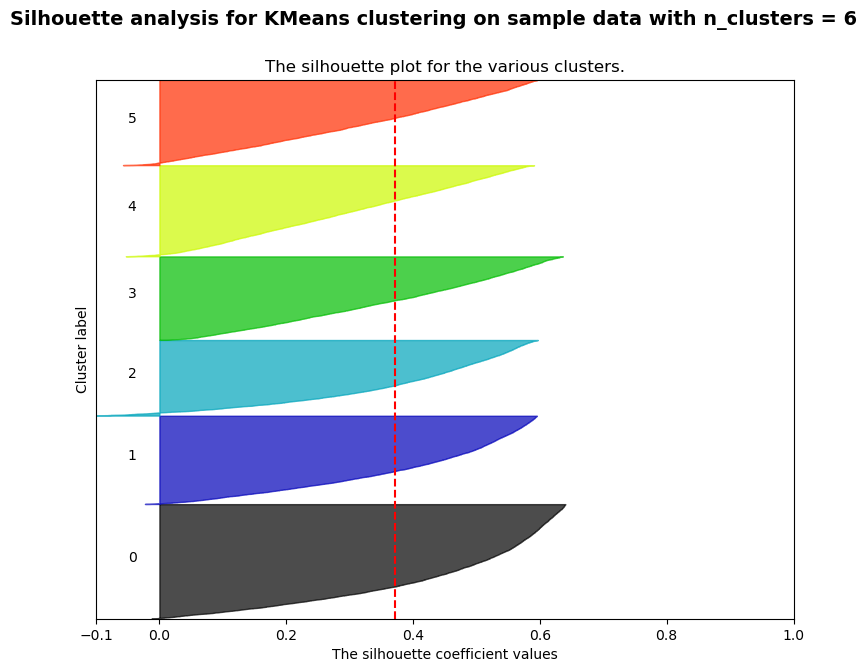

In [11]:
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

def kmeans_silhouette_analysis(X, range_n_clusters):
    for n_clusters in range_n_clusters:
        # Create a subplot with 1 row and 1 column
        fig, ax1 = plt.subplots(1, 1)
        fig.set_size_inches(9, 7)

        # The 1st subplot is the silhouette plot
        ax1.set_xlim([-0.1, 1])
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        clusterer = KMeans(n_clusters=n_clusters, n_init="auto", random_state=10)
        cluster_labels = clusterer.fit_predict(X)

        silhouette_avg = silhouette_score(X, cluster_labels)

        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(
                np.arange(y_lower, y_upper),
                0,
                ith_cluster_silhouette_values,
                facecolor=color,
                edgecolor=color,
                alpha=0.7,
            )

            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
        ax1.set_yticks([])
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        print(f"For n_clusters = {n_clusters}, The average silhouette_score is : {silhouette_avg}")
        
        plt.suptitle(
            "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
            % n_clusters,
            fontsize=14,
            fontweight="bold",
        )

        plt.show()

        
        
range_n_clusters = [2, 3, 4, 5, 6]


kmeans_silhouette_analysis(X_scaled, range_n_clusters)

Based on the plots, the number of clusters is 3, since it has the highest silhouette score.

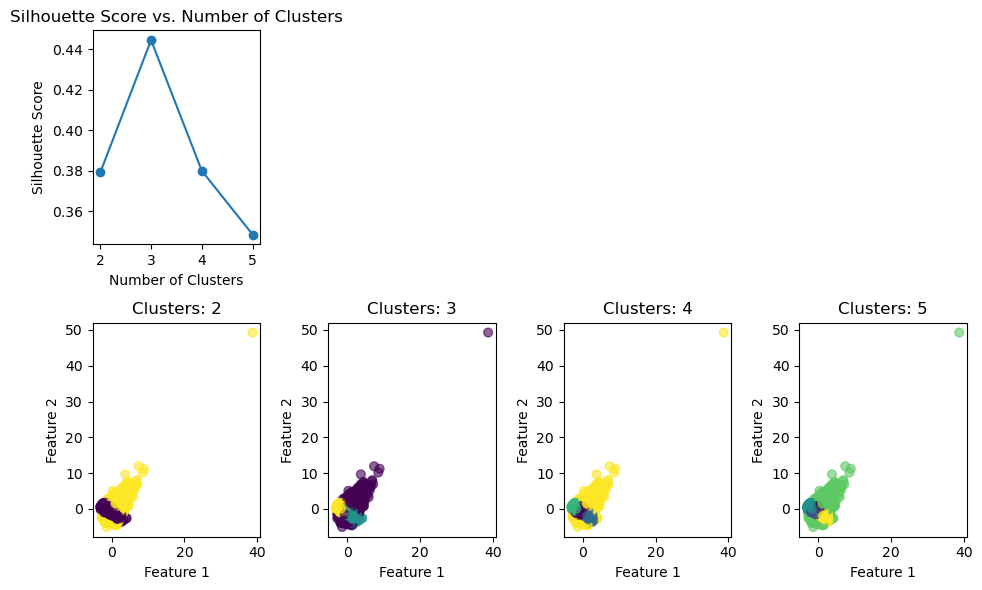

The best number of clusters is: 3


In [12]:
silhouette_scores = []
num_clusters_range = range(2, 6)
best_num_clusters = None

for n_clusters in num_clusters_range:
    gmm = GaussianMixture(n_components=n_clusters, random_state=0)
    labels = gmm.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    silhouette_scores.append(score)

 
    if best_num_clusters is None or score > silhouette_scores[best_num_clusters - 2]:
        best_num_clusters = n_clusters


plt.figure(figsize=(12, 6))
plt.subplot(2, 5, 1)
plt.plot(num_clusters_range, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Number of Clusters')


for i, n_clusters in enumerate(num_clusters_range):
    gmm = GaussianMixture(n_components=n_clusters, random_state=0)
    labels = gmm.fit_predict(X_scaled)

    plt.subplot(2, 5, i+6)
    plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='viridis', s=40, alpha=0.6)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(f'Clusters: {n_clusters}')

plt.tight_layout()
plt.show()

print(f"The best number of clusters is: {best_num_clusters}")

## GMM and KMeans plots

/home/maximka/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


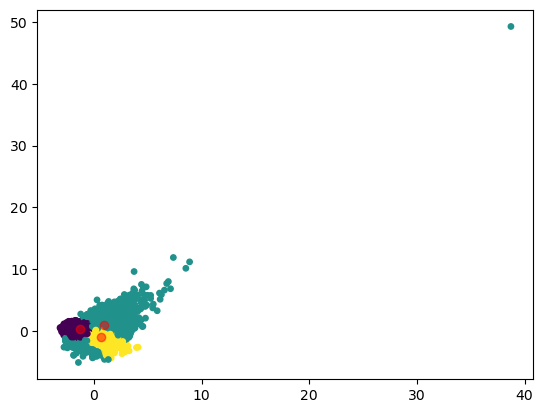

In [13]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=3, random_state=69)
gmm_labels = gmm.fit_predict(X_scaled)

kmeans = KMeans(n_clusters=3, random_state=69)
kmeans_labels = kmeans.fit_predict(X_scaled)

kmeans_centroids = kmeans.cluster_centers_
gmm_means = gmm.means_


plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=gmm_labels, s=15, cmap='viridis')
plt.scatter(gmm_means[:, 0], gmm_means[:, 1], c='red', alpha=0.5)
plt.show()

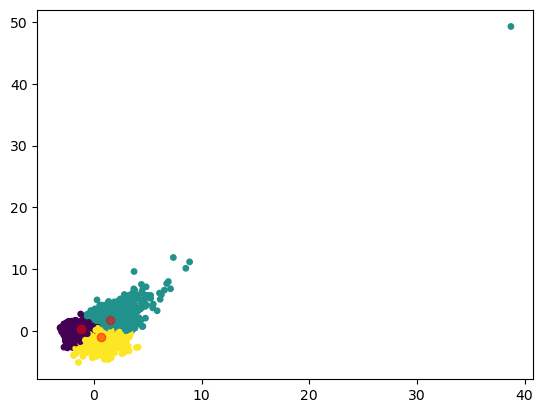

In [14]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=kmeans_labels, s=15, cmap='viridis')
plt.scatter(kmeans_centroids[:, 0], kmeans_centroids[:, 1], c='red', alpha=0.5)
plt.show()

## Cluster Analysis

In [15]:
gmm_means = pca.inverse_transform(gmm_means)
gmm_means = scaler.inverse_transform(gmm_means)

pd.DataFrame(data=gmm_means, columns=df.columns[:-1])

,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,day_of_month,month,last_contact_duration,num_contacts_in_campaign,num_contacts_prev_campaign,prev_campaign_outcome
0,39.809140,3.210757,1.097549,0.959203,0.026258,919.297963,0.816428,0.210546,1.296047,14.726952,7.390360,249.029182,2.670027,-0.204074,2.914585
1,37.744566,4.496846,1.319246,1.338925,0.006205,1437.341765,0.623696,0.147478,0.214837,12.905970,5.452551,270.535741,1.927478,2.395927,1.743342
2,42.735915,5.313690,1.138946,1.407829,0.017017,1721.595924,0.252071,0.141821,0.301042,16.336341,3.719185,245.769116,3.499646,0.049068,2.802008


In [17]:
kmeans_centroids = pca.inverse_transform(kmeans_centroids)
kmeans_centroids = scaler.inverse_transform(kmeans_centroids)

pd.DataFrame(data=kmeans_centroids, columns=df.columns[:-1])

,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,day_of_month,month,last_contact_duration,num_contacts_in_campaign,num_contacts_prev_campaign,prev_campaign_outcome
0,39.752948,3.248199,1.103804,0.970151,0.025689,934.352040,0.810662,0.208731,1.265049,14.676786,7.333633,249.631441,2.649678,-0.130862,2.881606
1,35.324687,4.424495,1.435980,1.386881,-0.002141,1426.214522,0.734817,0.137184,-0.035343,11.162740,5.763796,284.787618,1.146882,3.858442,1.083924
2,42.855850,5.393631,1.140077,1.424646,0.016698,1752.032806,0.230274,0.139256,0.264282,16.403835,3.578937,245.592287,3.533997,0.053187,2.800210
